# Income prediction on census data

# Objective:
To predict whether income exceeds 50K/yr based on census data

Dataset: Adult Data Set

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data


Variable description:
    
age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

In [2]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

In [3]:
# For preprocessing the data
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing

In [4]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

In [5]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [106]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [7]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Python Course/'

Mounted at /content/drive


In [8]:
adult_df = pd.read_csv(f'{path}/adult.data', header = None, delimiter=' *, *', engine='python')

Load the dataset. Observe that this file has .data extention

For importing the census data, we are using pandas read_csv() method. This method is a very simple and fast method for importing
data.

We are passing four parameters. The ‘adult.data’ parameter is the file name. The header parameter is for giving details to pandas
that whether the first row of data consists of headers or not. In our dataset, there is no header. So, we are passing None.

The delimiter parameter is for giving the information the delimiter that is separating the data. Here, we are using ‘ , ’
delimiter. This delimiter is to show delete the spaces before and after the data values. This is very helpful when there is
inconsistency in spaces used with data values.

In [9]:
# Print columns in the adult data set
adult_df.columns
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Adding headers to the dataframe
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [11]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# Number of records(rows) in the dataframe
len(adult_df)

32561

In [13]:
adult_df.shape

(32561, 15)

In [14]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
adult_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [15]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The above output shows that there is no “null” value in our dataset.

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of
missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables
with values as “?”.

In [16]:
for value in ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']:
    print(value,":", sum(adult_df[value] == '?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


The output of the above code snippet shows that there are 1836 missing values in workclass attribute. 1843 missing values in
occupation attribute and 583 values in native_country attribute.

# Data preprocessing

For preprocessing, we are going to make a duplicate copy of our original dataframe.We are duplicating adult_df to adult_df_rev
dataframe. Observe that we have used deep copy while copying. Why?

In [17]:
## Deep copy of adult_df
adult_df_rev = adult_df.copy(deep=True)

Before doing missing values handling task, we need some summary statistics of our dataframe. For this, we can use describe()
method. It can be used to generate various summary statistics, excluding NaN values.

In [18]:
adult_df_rev.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
adult_df_rev.shape

(32561, 15)

We are passing an “include” parameter with value as “all”, this is used to specify that. we want summary statistics of all the
attributes.

In [20]:
adult_df_rev.describe(include= 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Data imputation

Some of the categorical values have missing values i.e, “?”. We replace the “?” with the above describe methods top row’s value.
For example, we replace the “?” values of workplace attribute with “Private” value.

In [21]:
adult_df_rev.describe(include='all')['workclass'][2]


'Private'

In [22]:
for value in ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']:
    #adult_df_rev[value].replace(['?'], [adult_df_rev.describe(include='all')[value][2]],inplace='True')
    replaceValue = adult_df_rev.describe(include='all')[value][2]
    adult_df_rev[value][adult_df_rev[value]=='?'] = replaceValue

For Naive Bayes, we need to convert all the data values in one format.

We are going to encode all the labels with the value between 0 and n_classes-1. In the present case, it will be 0 and 1.

For implementing this, we are going to use LabelEncoder of scikit learn library.

In [24]:
# Hot Encoding
le = preprocessing.LabelEncoder()

workclass_cat = le.fit_transform(adult_df.workclass)
education_cat = le.fit_transform(adult_df.education)
marital_cat   = le.fit_transform(adult_df.marital_status)
occupation_cat = le.fit_transform(adult_df.occupation)
relationship_cat = le.fit_transform(adult_df.relationship)
race_cat = le.fit_transform(adult_df.race)
sex_cat = le.fit_transform(adult_df.sex)
native_country_cat = le.fit_transform(adult_df.native_country)

In [28]:
workclass_cat

array([7, 6, 4, ..., 4, 4, 5])

In [30]:
#initialize the encoded categorical columns
adult_df_rev['workclass_cat'] = workclass_cat
adult_df_rev['education_cat'] = education_cat
adult_df_rev['marital_cat'] = marital_cat
adult_df_rev['occupation_cat'] = occupation_cat
adult_df_rev['relationship_cat'] = relationship_cat
adult_df_rev['race_cat'] = race_cat
adult_df_rev['sex_cat'] = sex_cat
adult_df_rev['native_country_cat'] = native_country_cat

In [27]:
adult_df_rev.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,4,1,1,4,1,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,2,4,0,4,1,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,0,6,1,4,1,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,2,6,0,2,1,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,2,10,5,2,0,5


In [33]:
#drop the old categorical columns from dataframe
dummy_fields = ['workclass','education','marital_status','occupation','relationship','race', 'sex', 'native_country']
adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)
adult_df_rev.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
0,39,77516,13,2174,0,40,<=50K,7,9,4,1,1,4,1,39
1,50,83311,13,0,0,13,<=50K,6,9,2,4,0,4,1,39
2,38,215646,9,0,0,40,<=50K,4,11,0,6,1,4,1,39
3,53,234721,7,0,0,40,<=50K,4,1,2,6,0,2,1,39
4,28,338409,13,0,0,40,<=50K,4,9,2,10,5,2,0,5


Reindex all the columns properly. We have passed the list of column names as a parameter and axis=1 for reindexing the columns.

In [ ]:
adult_df_rev = adult_df_rev.reindex(['age', 'workclass_cat', 'fnlwgt', 'education_cat',
                                    'education_num', 'marital_cat', 'occupation_cat',
                                    'relationship_cat', 'race_cat', 'sex_cat', 'capital_gain',
                                    'capital_loss', 'hours_per_week', 'native_country_cat',
                                    'income'], axis= 1)
adult_df_rev.head(5)

,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


Now we have created multiple categorical columns like “marital_cat”, “race_cat” etc. !

# Data Slicing

In [34]:
adult_df_rev.shape

(32561, 15)

In [55]:
# Arrange data into independent variables and dependent variables keeping last 10 rows as new
# citizens data for later predictions using model
#
X = adult_df_rev.values[:-10,:14]  ## Features
Y = adult_df_rev.values[:-10,14]  ## Target
#
X_new=adult_df_rev.values[-10:,:14]
# We will use last 10 rows as new citizens data and predict income category with the NB model
# If you have separate new citizens data with same format as 'adult.data' - then read it into
# separate dataframe and concatenate the 2 dataframes and later split it as shown above after
# doing common transformation of data using the concatenated df -
# later we will learn about 'pipelines' (in FMT Module 4) to make above process easy

In [81]:
allExecptLast10 = adult_df_rev.iloc[:-10]
X = allExecptLast10.drop('income',axis=1)
Y = allExecptLast10['income']
X_new=allExecptLast10.drop('income',axis=1).iloc[-10:]



In [69]:
X.shape

(32551, 14)

In [70]:
Y.shape

(32551,)

In [82]:
# Split the data into train and test
# Train data size: 70% of original data
# Test data size: 30% of original data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

Implement Gaussian Naive Bayes

In [83]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it.
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its
parameters.

In [84]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [79]:
Y_pred = clf.predict(X_test)

In [85]:
print(clf.predict(X_new))

['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']


In [87]:
Y_pred[-10:]

array(['>50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K'], dtype='<U5')

In [86]:
print(Y_test[-10:])
# You can compare new citizen predictions(Y_pred) above with actuals(Y_test) below
# and see 7 out of 10 right

13499     >50K
28817     >50K
9337     <=50K
190      <=50K
13550    <=50K
4802     <=50K
31823    <=50K
10192     >50K
32176    <=50K
13574    <=50K
Name: income, dtype: object


In [88]:
clf.score(X_test,Y_test)

0.7882045768699124

Accuracy of our Gaussian Naive Bayes model

In [89]:
accuracy_score(Y_test, Y_pred, normalize = True)

0.7882045768699124

In [91]:
Y_prob = clf.predict_proba(X_test)

In [92]:
X_test

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
7726,58,49893,10,0,0,45,4,15,2,12,0,4,1,39
25203,17,167658,8,0,0,6,4,2,4,12,3,4,0,39
31131,17,277541,7,0,0,5,4,1,4,12,3,4,1,39
23509,62,266624,9,6418,0,40,4,11,2,5,0,4,1,39
6159,41,141642,9,0,0,40,4,11,4,8,1,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,25,290528,9,0,0,40,4,11,2,7,0,4,1,39
31823,58,294313,10,0,0,55,2,15,2,1,5,2,0,39
10192,59,453067,10,0,0,36,4,15,2,10,0,4,1,39
32176,41,160785,9,0,0,40,2,11,2,3,0,4,1,39


In [93]:
Y_prob

array([[9.62861869e-01, 3.71381307e-02],
       [9.99948499e-01, 5.15014741e-05],
       [9.99966999e-01, 3.30013179e-05],
       ...,
       [9.82587971e-01, 1.74120286e-02],
       [9.83199052e-01, 1.68009478e-02],
       [9.74631146e-01, 2.53688539e-02]])

In [94]:
print(clf.predict_proba(X_new))

[[0.99313961 0.00686039]
 [0.99500639 0.00499361]
 [0.96987693 0.03012307]
 [0.98939878 0.01060122]
 [0.99691098 0.00308902]
 [0.98021567 0.01978433]
 [0.98146713 0.01853287]
 [0.89004159 0.10995841]
 [0.98263146 0.01736854]
 [0.97107218 0.02892782]]


In [95]:
print(clf.predict(X_new))

['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']


In [119]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    income_predict = knn_3.predict(X_train)
    acc = accuracy_score(Y_train, income_predict)  # to compute Accuracy
    recall = recall_score(Y_train, income_predict,pos_label='>50K')  # to compute Recall
    precision = precision_score(Y_train, income_predict,pos_label='>50K')  # to compute Precision
    f1 = f1_score(Y_train, income_predict,pos_label='>50K')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [97]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [99]:
# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [111]:
income_predict = knn_3.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, income_predict)))
print()

In [103]:
income_predict = knn_3.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, income_predict)))
print()

Model Accuracy: 0.7564



In [120]:
knn_perf_test = model_performance_classification_sklearn(
    knn_3, X_test, Y_test
)
knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.863825,0.603873,0.778902,0.68031


In [122]:
clf_test = model_performance_classification_sklearn(
    clf, X_test, Y_test
)
clf_test

,Accuracy,Recall,Precision,F1
0,0.863825,0.603873,0.778902,0.68031


In [136]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
precision_scores_train = []
precision_scores_test = []

recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(Y_train, y_pred_train,pos_label='>50K')
    recall_scores_train.append(scores_train)
    scores_test = recall_score(Y_test, y_pred_test,pos_label='>50K')
    recall_scores_test.append(scores_test)
    # evaluate precesion on train and test
    precision_train = precision_score(Y_train, y_pred_train,pos_label='>50K')
    precision_scores_train.append(scores_train)
    scores_test = recall_score(Y_test, y_pred_test,pos_label='>50K')
    precision_scores_test.append(scores_test)

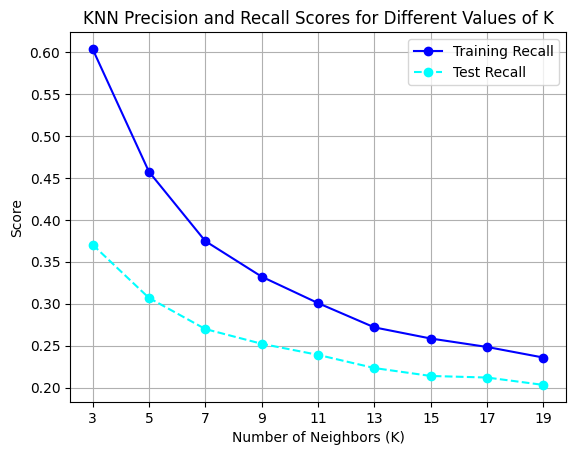

In [141]:
import matplotlib.pyplot as plt
# Plot recall scores
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o', linestyle='-', color='blue')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o', linestyle='--', color='cyan')

# Adding titles and labels
plt.title('KNN Precision and Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)

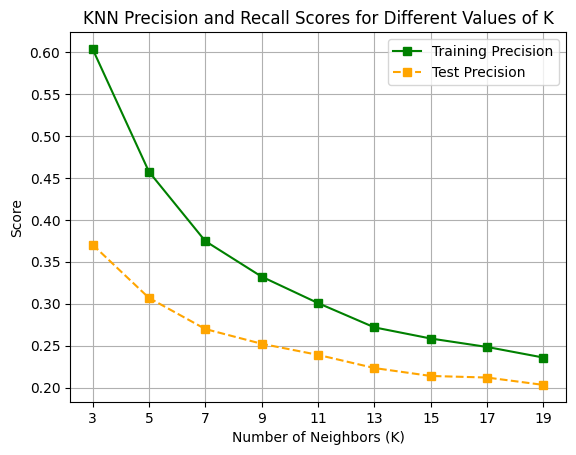

In [142]:
import matplotlib.pyplot as plt
# Plot precision scores
plt.plot(neighbors, precision_scores_train, label='Training Precision', marker='s', linestyle='-', color='green')
plt.plot(neighbors, precision_scores_test, label='Test Precision', marker='s', linestyle='--', color='orange')
# Adding titles and labels
plt.title('KNN Precision and Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)

- The recall and precession scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.